1 (a)

$\int_{-\infty}^\infty f_X(x)dx = 1$ so $\int_{-1}^2 c(x^2+x+2)dx = c[\frac{x^3}{3}+\frac{x^2}{2} + 2x]^2_{-1} = \frac{21}{2}c = 1$.  
Therefore $c = \frac{2}{21}$

1 (b)

$E[X] = \int_{-\infty}^\infty xf_X(x)dx = \int_{-1}^2 cx(x^2+x+2)dx = c\frac{39}{4} = \frac{13}{14}$

1 (c)

$P(Y<y) = P(X^2<y) = P(-\sqrt{y} \leq X \leq \sqrt{y})$ =  
$
= \left\{
        \begin{array}{ll}
            0 & \quad y < 0 \\
            \int_{-\sqrt{y}}^{\sqrt{y}} c(x^2+x+2)dx & \quad 0 \leq y < 1 \\
            \int_{-1}^{\sqrt{y}} c(x^2+x+2)dx & \quad 1 \leq y < 4 \\
            1 & \quad y \geq 4
        \end{array}
    \right. \\  
= \left\{
        \begin{array}{ll}
            0 & \quad y < 0 \\
            \frac{4}{63}\sqrt{y}(y+6) & \quad 0 \leq y < 1 \\
            \frac{1}{63}(2y^{3/2}+3y+12\sqrt{y}+11) & \quad 1 \leq y < 4 \\
            1 & \quad y \geq 4
        \end{array}
    \right.
$

1 (d)

$f_Y(y)$
$
= \left\{
        \begin{array}{ll}
            \frac{2y+4}{21\sqrt{y}} & \quad 0 \leq y < 1 \\
            \frac{y+\sqrt{y}+2}{21\sqrt{y}} & \quad 1 \leq y < 4 \\
            0 & \quad otherwise
        \end{array}
    \right.
$

(I used Wolfram Alpha to do the calculations in part d)

2 (a)

$\int_{-\infty}^\infty f_X(x)dx = 1$ so $\int_{1/2}^3 ax+\frac{2}{9} = \frac{35}{8}a + \frac{5}{9} = 1$  
Therefore $a = \frac{32}{315} \approx 0.1016$

2 (b)

$P(Y=y)$  
$
= \left\{
        \begin{array}{ll}
            \int_{1/2}^{1} (ay+\frac{2}{9})dy & \quad y=0 \\
            \int_{1}^{2} (ay+\frac{2}{9})dy & \quad y=1 \\
            \int_{2}^{3} (ay+\frac{2}{9})dy & \quad y=2
        \end{array}
    \right.
$  
$
= \left\{
        \begin{array}{ll}
            \frac{47}{315} & \quad y=0 \\
            \frac{118}{315} & \quad y=1 \\
            \frac{10}{21} & \quad y=2
        \end{array}
    \right.
$

2 (c)

$E[Y] = 0\frac{47}{315} + 1\frac{118}{315} + 2\frac{10}{21} = \frac{418}{315}$  
$E[Y^2] = 0\frac{47}{315} + 1\frac{118}{315} + 4\frac{10}{21} = \frac{718}{315}$  
So $var(Y) = E[Y^2] - E[Y]^2 \approx 0.5185$

3 (a)

The binomial distribution gives the probability that $x$ out of $n$ trials were 'successful', where each trial is independent and occurs with probability $p$. Since Team A wins the series if it wins more than half of the games, $f(n,p) = P(X \geq \frac{n+1}{2})$.

3 (b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

In [2]:
def win_prob(n,p):
    prob = 0
    for i in range(int((n+1)/2),n+1):
        prob += binom(n,i)*p**i*(1-p)**(n-i)
    return prob

In [3]:
p = np.arange(0.5, 1, 0.01)
wp1 = win_prob(7,p)

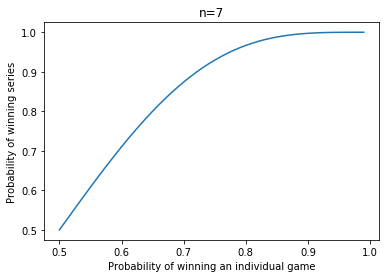

In [4]:
plt.plot(p, wp1)
plt.title('n=7')
plt.xlabel('Probability of winning an individual game')
plt.ylabel('Probability of winning series')
plt.show()

In [5]:
n = np.arange(1,22,2)
wp2 = np.zeros(len(n))
for i in range(len(n)):
    wp2[i] = win_prob(n[i], 0.55)

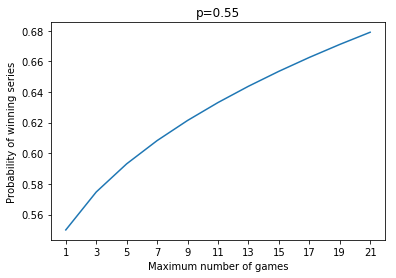

In [6]:
plt.plot(n, wp2)
plt.title('p=0.55')
plt.xlabel('Maximum number of games')
plt.xticks(n)
plt.ylabel('Probability of winning series')
plt.show()

For a series of fixed length, it is obviously a significant advantage to have a higher individual game win probability. With a fixed individual game win probability, due to the law of large numbers, it is advantageous for the better team to player a longer series. Changing $p$ has a much larger effect on which teams wins the series as opposed to changing $n$.

4 (a)

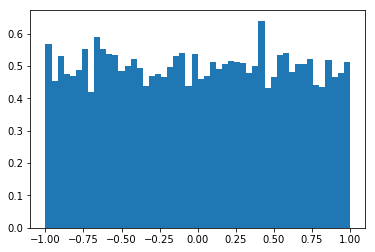

In [7]:
X = np.random.uniform(-1, 1, 10000)
plt.hist(X,bins = 50,normed = True)
plt.show()

4 (b)

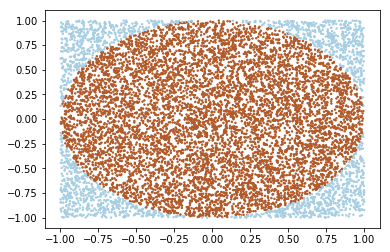

In [8]:
X = np.random.uniform(-1, 1, 10000)
Y = np.random.uniform(-1, 1, 10000)
Z = np.sqrt(X**2 + Y**2) < 1
plt.scatter(X,Y, c = Z, s = 2.0, cmap=plt.cm.Paired)
plt.show()

4 (c)

In [9]:
def relative_error(n):
    X = np.random.uniform(-1, 1, n)
    Y = np.random.uniform(-1, 1, n)
    Z = np.sqrt(X**2 + Y**2) < 1
    N_circle = Z.sum()
    pi_n = 4*N_circle/n
    return np.abs(pi_n - np.pi)/np.pi

In [10]:
n = np.arange(1, 1000, 10)
error = np.empty(len(n))
for i in range(len(n)):
    error[i] = relative_error(n[i])
inv = 1/np.sqrt(n)

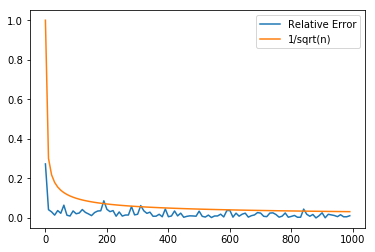

In [11]:
plt.plot(n, error, label='Relative Error')
plt.plot(n, inv, label='1/sqrt(n)')
plt.legend(loc='upper right')
plt.show()

The relative error takes on values similar to the function $\frac{1}{\sqrt{n}}$ (on average slightly smaller). The function is deterministic and smooth whereas the relative error from simulation is stochastic and non-smooth.

4 (d)

In [12]:
def nball_volume(n):
    X = [0]*n
    radii = np.zeros(100000)
    for i in range(n):
        X[i] = np.random.uniform(-1, 1, 100000)
        radii += X[i]**2
    N_sphere = (np.sqrt(radii) < 1).sum()
    return N_sphere*(2**n)/100000

In [13]:
n = np.arange(2, 21, 1)
volume = np.zeros(len(n))
for i in range(len(n)):
    volume[i] = nball_volume(n[i])

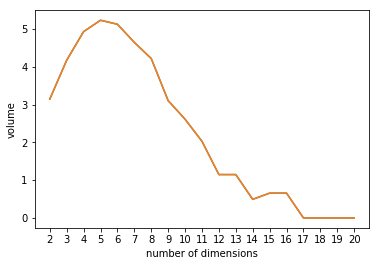

In [16]:
plt.plot(n, volume)
plt.xlabel('number of dimensions')
plt.xticks(n)
plt.ylabel('volume')
plt.show()

The estimates of the volume become less accurate as the number of dimensions increases: since we are summing (the square) of more terms, there is more randomness in seeing if this value is less than or greater than 1. The estimates seem noisy due to the increased effect of randomness.